Notebook for building analysis of resulting synapse distribution

In [1]:
import os
import sys
sys.path.append("../")
sys.path.append("../Modules/")
import pandas as pd
import h5py

from Modules import analysis
from Modules import view_synapses

## Pick Simulation

In [2]:
sim_dir = "/home/drfrbc/Neural-Modeling/scripts/2025-04-01-00-13-Running_5sec_STA_noRhyth/sta_Complex_DepthPeriInh0.0000_DepthDistalInh0.0000_InhTuftDensity0.3300_0.4400_0.3850_0.0572_0.2200_0.1100_ExcTuftDensity0.4860_0.3240_0.1080_0.5400_1.2982_Np5000"

sim_dir = "/home/drfrbc/Neural-Modeling/scripts/2025-04-02-11-37-Running_5sec_STA_noRhyth/sta_Complex_DepthPeriInh0.0150_DepthDistalInh0.0150_InhTuftDensity0.3300_0.4400_0.3850_0.0572_0.2200_0.1650_ExcTuftDensity0.4860_0.3240_0.1080_0.5400_0.6491_Np5000"

sim_dir = "/home/drfrbc/Neural-Modeling/scripts/2025-04-02-18-27-Running_5sec_STA_noRhyth/sta_Complex_DepthPeriInh0.0150_DepthDistalInh0.0150_InhTuftDensity0.3300_0.4400_0.3850_0.0572_0.2200_0.1650_ExcTuftDensity0.4860_0.3240_0.1080_0.5400_0.6491_Np5000"

sim_dir = "/home/drfrbc/Neural-Modeling/scripts/2025-04-02-18-13-Running_5sec_STA_noRhyth/sta_Complex_DepthPeriInh0.0150_DepthDistalInh0.0150_InhTuftDensity0.3300_0.4400_0.3850_0.0572_0.2200_0.1650_ExcTuftDensity0.4860_0.3240_0.1080_0.5400_0.6491_Np5000"

sim_dir = "/home/drfrbc/Neural-Modeling/scripts/2025-04-04-13-49-L23_5sec_STA_Rhyth/sta_Complex_DepthPeriInh0.0150_DepthDistalInh0.0150_InhTuftDensity0.2200_0.2200_0.1650_ExcTuftDensity2.1600_2.1600_Np5000"

sim_dir = "/home/drfrbc/Neural-Modeling/scripts/2025-04-04-14-11-L23_5sec_STA_Rhyth/sta_Complex_DepthPeriInh0.0150_DepthDistalInh0.0150_InhDens0.0220_0.0220_0.0165_ExcDens4.3200_4.3200_Np5000"

sim_dir = "/home/drfrbc/Neural-Modeling/scripts/2025-04-04-16-36-L23_5sec_STA_Rhyth/sta_Complex_DepthPeriInh0.0150_DepthDistalInh0.0150_InhDens0.2200_0.2200_0.2200_ExcDens1.6200_2.1600_Np5000"

sim_dir = "/home/drfrbc/Neural-Modeling/scripts/2025-03-31-21-15-Complex_50sec_STA/sta_Complex_DepthPeriInh0.0150_DepthDistalInh0.0150_InhTuftDensity0.3300_0.4400_0.3850_0.0572_0.2200_0.1100_ExcTuftDensity0.4860_0.3240_0.1080_0.5400_1.2982_Np5000"

sim_dir = "/home/drfrbc/Neural-Modeling/scripts/2025-04-10-10-36-L5_Testing_Seeding_dec_tuft_inh_dens/tuning_Complex_DepthPeriInh0.0150_DepthDistalInh0.0150_InhTuftDensity0.1650_0.4400_0.3850_0.0572_0.2200_0.1650_ExcTuftDensity0.4860_0.3240_0.1080_0.5400_0.6491_Np5000"

sim_dir = "/home/drfrbc/Neural-Modeling/scripts/2025-04-10-10-55-L5_Testing_Seeding_inc_tuft_inh_dens/tuning_Complex_DepthPeriInh0.0150_DepthDistalInh0.0150_InhTuftDensity0.4950_0.4400_0.3850_0.0572_0.2200_0.1650_ExcTuftDensity0.4860_0.3240_0.1080_0.5400_0.6491_Np5000"

sim_dir = "/home/drfrbc/Neural-Modeling/scripts/2025-04-15-14-00-L5_Testing_Seeding_inc_tuft_inh_dens/tuning_Complex_DepthPeriInh0.0150_DepthDistalInh0.0150_InhTuftDensity0.4950_0.4400_0.3850_0.0572_0.2200_0.1650_ExcTuftDensity0.4860_0.3240_0.1080_0.5400_0.6491_Np5000"

sim_dir = "/home/drfrbc/Neural-Modeling/scripts/2025-04-16-10-10-L5_Testing_Seeding_inc_tuft_inh_dens/tuning_Complex_DepthPeriInh0.0150_DepthDistalInh0.0150_InhTuftDensity0.2200_0.4400_0.3850_0.0572_0.2200_0.1650_ExcTuftDensity2.1600_2.1600_2.1600_2.1600_2.1600_Np5000"

In [3]:
save_folder = os.path.join(sim_dir, 'synapse_distribution')

if not os.path.exists(save_folder):
    os.mkdir(save_folder)

## Loading Data

Read files

In [4]:
# read synapses from simulation
syn_data = view_synapses.read_synapse_distribution_file(sim_dir)

# read segment data from simulation
seg_data = pd.read_csv(os.path.join(sim_dir, "segment_data.csv"))

# read transfer impedances
imp_df = view_synapses.read_transfer_impedance_file(sim_dir, loc='soma')
seg_data['soma_trans_imp'] = imp_df.beta_active

# add segment information of synapse location
syn_data = view_synapses.add_seg_info_to_syn_data(syn_data, seg_data)
# syn_data2 = view_synapses.add_seg_info_to_syn_data(syn_data, seg_data)

In [5]:
# read synapses from simulation
# syn_data = view_synapses.read_synapse_distribution_file(sim_dir)
# syn_data

In [6]:
# seg_data.columns

In [7]:
# seg_data[seg_data['Unnamed: 0'] == 1724]

In [8]:
# len(seg_data)

In [9]:
# syn_data2

Choose transfer impedance for analysis

In [10]:
# choose transfer impedance
seg_data['soma_trans_imp'] = imp_df.beta_active

Check that the seg indices correspond

In [11]:
# checks
if len(seg_data) != len(imp_df):
    IndexError(f"{len(seg_data)} != {max(syn_data.seg_id)}. The imp_df does not correspond to seg_data")
if len(seg_data) != max(syn_data.seg_id):
    print(f"{len(seg_data)} != {max(syn_data.seg_id)} need to check that syn_data.seg_id actually corresponds to seg_data row index.")

2630 != 2616 need to check that syn_data.seg_id actually corresponds to seg_data row index.


Previews

In [12]:
seg_data

,Unnamed: 0,section,idx_in_section_type,seg_half_seg_RA,L,seg,pseg,Section_L,Section_diam,Distance,...,pc_1,pc_2,p1_0,p1_1,p1_2,r,dl_0,dl_1,dl_2,soma_trans_imp
0,0,soma,0,0.081276,23.169408,L5PCtemplate[0].soma[0](0.5),None,23.169408,13.471518,0.000000,...,18.343678,-50.250000,57.287731,19.065830,-50.250000,6.735759,23.124348,1.444304,0.000000,1.000000
1,1,dend,0,2.647135,4.840176,L5PCtemplate[0].dend[0](0.1),L5PCtemplate[0].soma[0](0.5),24.200878,1.170000,2.420088,...,20.787594,-50.027254,61.001504,21.408927,-49.444755,0.539452,4.591504,1.178928,0.805245,0.929486
2,2,dend,0,2.250969,4.840176,L5PCtemplate[0].dend[0](0.3),L5PCtemplate[0].dend[0](0.1),24.200878,1.170000,7.260263,...,21.939324,-50.557475,64.964606,21.737526,-51.687077,0.585000,3.963102,0.328599,-2.242322,0.851091
3,3,dend,0,2.250969,4.840176,L5PCtemplate[0].dend[0](0.5),L5PCtemplate[0].dend[0](0.3),24.200878,1.170000,12.100439,...,21.040891,-51.991813,68.301396,20.356904,-50.119401,0.585000,3.336790,-1.380622,1.567676,0.781747
4,4,dend,0,2.250969,4.840176,L5PCtemplate[0].dend[0](0.7),L5PCtemplate[0].dend[0](0.5),24.200878,1.170000,16.940615,...,19.672918,-48.246989,70.726764,18.807201,-46.252588,0.585000,2.425368,-1.549704,3.866813,0.720767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,2625,axon,0,2.938245,4.615385,L5PCtemplate[0].axon[0](0.653846),L5PCtemplate[0].axon[0](0.576923),60.000004,1.000000,39.230772,...,57.574449,-50.250000,45.725559,59.882142,-50.250000,0.500000,0.000000,4.615385,0.000000,0.436135
2626,2626,axon,0,2.938245,4.615385,L5PCtemplate[0].axon[0](0.730769),L5PCtemplate[0].axon[0](0.653846),60.000004,1.000000,43.846157,...,62.189834,-50.250000,45.725559,64.497527,-50.250000,0.500000,0.000000,4.615385,0.000000,0.406617
2627,2627,axon,0,2.938245,4.615385,L5PCtemplate[0].axon[0](0.807692),L5PCtemplate[0].axon[0](0.730769),60.000004,1.000000,48.461542,...,66.805219,-50.250000,45.725559,69.112912,-50.250000,0.500000,0.000000,4.615385,0.000000,0.380675
2628,2628,axon,0,2.938245,4.615385,L5PCtemplate[0].axon[0](0.884615),L5PCtemplate[0].axon[0](0.807692),60.000004,1.000000,53.076926,...,71.420604,-50.250000,45.725559,73.728296,-50.250000,0.500000,0.000000,4.615385,0.000000,0.357720


In [13]:
syn_data

,mean_firing_rate,pc_name,seg_id,synapse_type,weight,Distance,section,soma_trans_imp,seg_L
0,2.8,b'fg_1_cell4',1804,inh_tuft,14.975385,852.773556,apic,0.065304,4.897284
1,3.0,b'fg_1_cell36',1716,inh_tuft,15.048280,948.428984,apic,0.039175,4.764900
2,2.4,b'fg_3_cell44',2219,inh_tuft,14.897348,1210.803477,apic,0.001059,4.891071
3,3.4,b'fg_8_cell7',1988,inh_tuft,15.087943,1161.831562,apic,0.003873,4.866735
4,2.4,b'fg_8_cell38',2082,inh_tuft,14.788509,1265.911702,apic,0.000560,4.942759
...,...,...,...,...,...,...,...,...,...
29205,1.2,b'fg_47_cell60',1003,exc_distal_basal,1.500000,122.252737,dend,0.045064,4.825387
29206,1.6,b'fg_17_cell24',796,exc_distal_basal,1.500000,120.908335,dend,0.091708,4.918778
29207,0.0,b'fg_6_cell30',59,exc_distal_basal,1.500000,127.233505,dend,0.085236,4.872412
29208,0.0,b'fg_19_cell59',170,exc_distal_basal,1.460020,90.154935,dend,0.080594,4.915324


## Plotting on Morphology

In [14]:
import pandas as pd

# Assume df is your existing dataframe
# Example: Create a column that classifies synapses as 'exc' or 'inh'
syn_data['synapse_class'] = syn_data['synapse_type'].apply(lambda x: 'exc' if x.startswith('exc') else ('inh' if x.startswith('inh') else None))

# Filter the dataframe into excitatory and inhibitory synapses
df_exc = syn_data[syn_data['synapse_class'] == 'exc']
df_inh = syn_data[syn_data['synapse_class'] == 'inh']

# Group by 'seg_id' and aggregate all other columns into lists
df_exc_grouped = df_exc.groupby('seg_id').agg(lambda x: list(x)).reset_index()
df_inh_grouped = df_inh.groupby('seg_id').agg(lambda x: list(x)).reset_index()

# Display the resulting dataframes
print("Excitatory synapses grouped by segment:")
print(df_exc_grouped)
print("\nInhibitory synapses grouped by segment:")
print(df_inh_grouped)


Excitatory synapses grouped by segment:
      seg_id                                   mean_firing_rate  \
0         12  [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, ...   
1         13  [0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, ...   
2         14                     [3.0, 3.0, 3.0, 3.0, 3.0, 3.0]   
3         15  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4         16  [2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, ...   
...      ...                                                ...   
2330    2612                     [1.6, 1.8, 1.8, 1.8, 1.6, 1.6]   
2331    2613                     [0.2, 0.4, 0.2, 0.2, 0.2, 0.2]   
2332    2614           [1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2]   
2333    2615           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
2334    2616      [0.4, 0.4, 0.4, 1.4, 1.8, 1.8, 0.4, 1.8, 1.8]   

                                                pc_name  \
0     [b'fg_39_cell11', b'fg_39_cell11', b'fg_39_cel...   
1     [b'fg_39_cell31', b'fg_39_cell3

In [15]:
import numpy as np
for df in [df_exc_grouped, df_inh_grouped]:

    df['seg_L'] = df['seg_L'].apply(np.mean)
    df['pc_name'] = np.array(df['pc_name'].apply(np.array))
    df['num_syns'] = df['pc_name'].apply(len)
    df['num_cells'] = df['pc_name'].apply(np.unique).apply(len) # number of cells per segment
    df['weight_mean'] = df['weight'].apply(np.mean) # mean weight
    df['weight_std'] = df['weight'].apply(np.std) # mean weight
    df['weight_sum'] = df['weight'].apply(np.sum) # mean weight

    # do same for fr
    df['fr_mean'] = df['mean_firing_rate'].apply(np.mean) # mean weight
    df['fr_std'] = df['mean_firing_rate'].apply(np.std) # mean weight
    df['fr_sum'] = df['mean_firing_rate'].apply(np.sum) # mean weight

    # Multiply weight and firing rate and sum
    df['weightXfr'] = df.apply(lambda row: [a * b for a, b in zip(row['weight'], row['mean_firing_rate'])], axis=1)
    df['weightXfr_sum'] = df['weightXfr'].apply(np.sum) # mean weight

    df['syn_density'] = df.apply(lambda row: [row['num_syns'] / row['seg_L']], axis=1)
    df['syn_density'] = [row[0] for row in df['syn_density']]

    # remove duplicates
    # df['section'] = df['section'].apply(np.unique)
    df['Distance'] = [row[0] if len(row) == 1 else ValueError('expecting one unique value in row') for row in df['Distance'].apply(np.unique)]

# df_exc_grouped[[row[0] == 'dend' for row in df_exc_grouped['section'].apply(np.unique)]] # subset by basal segments

In [16]:
len([row[0] if len(row) == 1 else ValueError('expecting one unique value in row') for row in df_exc_grouped['Distance'].apply(np.unique)]) # subset by basal segments

2335

In [17]:
df_inh_grouped

,seg_id,mean_firing_rate,pc_name,synapse_type,weight,Distance,section,soma_trans_imp,seg_L,synapse_class,...,num_cells,weight_mean,weight_std,weight_sum,fr_mean,fr_std,fr_sum,weightXfr,weightXfr_sum,syn_density
0,3,[14.8],[b'fg_0_cell40'],[inh_perisomatic],[4.5878401831537445],12.100439,[dend],[0.7817472641620662],4.840176,[inh],...,1,4.587840,0.000000,4.587840,14.8,0.0,14.8,[67.90003471067543],67.900035,0.206604
1,4,"[16.0, 16.0, 16.0, 16.0]","[b'fg_0_cell110', b'fg_0_cell110', b'fg_0_cell...","[inh_perisomatic, inh_perisomatic, inh_perisom...","[4.511009773243905, 4.587891542363604, 4.51739...",16.940615,"[dend, dend, dend, dend]","[0.7207665360049649, 0.7207665360049649, 0.720...",4.840176,"[inh, inh, inh, inh]",...,1,4.566014,0.056012,18.264056,16.0,0.0,64.0,"[72.17615637190248, 73.40626467781766, 72.2783...",292.224895,0.826416
2,5,"[19.0, 19.0]","[b'fg_0_cell26', b'fg_0_cell26']","[inh_perisomatic, inh_perisomatic]","[4.745377274889636, 4.5231292052288525]",21.780790,"[dend, dend]","[0.6671984241317321, 0.6671984241317321]",4.840176,"[inh, inh]",...,1,4.634253,0.111124,9.268506,19.0,0.0,38.0,"[90.16216822290308, 85.93945489934819]",176.101623,0.413208
3,8,[14.8],[b'fg_0_cell63'],[inh_perisomatic],[4.469067195446826],33.689751,[dend],[0.5090231344081244],3.795549,[inh],...,1,4.469067,0.000000,4.469067,14.8,0.0,14.8,[66.14219449261303],66.142194,0.263466
4,10,[20.0],[b'fg_0_cell69'],[inh_perisomatic],[4.4848105572592605],41.829059,[dend],[0.4035191893389926],4.891969,[inh],...,1,4.484811,0.000000,4.484811,20.0,0.0,20.0,[89.6962111451852],89.696211,0.204417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,2609,"[4.0, 4.0, 4.0]","[b'fg_7_cell3', b'fg_7_cell3', b'fg_7_cell3']","[inh_oblique, inh_oblique, inh_oblique]","[1.872111600429278, 1.7835106370522233, 1.8377...",125.406758,"[apic, apic, apic]","[0.1245178258951256, 0.1245178258951256, 0.124...",4.512228,"[inh, inh, inh]",...,1,1.831128,0.036474,5.493383,4.0,0.0,12.0,"[7.488446401717112, 7.134042548208893, 7.35104...",21.973532,0.664860
1795,2610,"[14.6, 14.6, 14.6]","[b'fg_7_cell12', b'fg_7_cell12', b'fg_7_cell12']","[inh_oblique, inh_oblique, inh_oblique]","[1.8933256103742833, 1.8907638580536255, 1.924...",93.713239,"[apic, apic, apic]","[0.2324523753584012, 0.2324523753584012, 0.232...",4.296385,"[inh, inh, inh]",...,1,1.902732,0.015151,5.708197,14.6,0.0,43.8,"[27.642553911464535, 27.605152327582932, 28.09...",83.339675,0.698261
1796,2611,[14.6],[b'fg_7_cell12'],[inh_oblique],[1.808417373378918],98.009624,[apic],[0.2081980652116502],4.296385,[inh],...,1,1.808417,0.000000,1.808417,14.6,0.0,14.6,[26.402893651332203],26.402894,0.232754
1797,2614,"[12.200000000000001, 12.200000000000001, 12.20...","[b'fg_0_cell11', b'fg_0_cell11', b'fg_0_cell11...","[inh_oblique, inh_oblique, inh_oblique, inh_ob...","[1.8503130560397025, 1.906344092801047, 1.8099...",110.898778,"[apic, apic, apic, apic]","[0.158295930220173, 0.158295930220173, 0.15829...",4.296385,"[inh, inh, inh, inh]",...,1,1.886972,0.064318,7.547889,12.2,0.0,48.8,"[22.573819283684372, 23.257397932172776, 22.08...",92.084251,0.931015


In [18]:
df_exc_grouped

,seg_id,mean_firing_rate,pc_name,synapse_type,weight,Distance,section,soma_trans_imp,seg_L,synapse_class,...,num_cells,weight_mean,weight_std,weight_sum,fr_mean,fr_std,fr_sum,weightXfr,weightXfr_sum,syn_density
0,12,"[0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, ...","[b'fg_39_cell11', b'fg_39_cell11', b'fg_39_cel...","[exc_distal_basal, exc_distal_basal, exc_dista...","[1.358187047190565, 1.333111077088573, 1.45653...",51.612998,"[dend, dend, dend, dend, dend, dend, dend, den...","[0.2819834556992703, 0.2819834556992703, 0.281...",4.891969,"[exc, exc, exc, exc, exc, exc, exc, exc, exc, ...",...,1,1.413174,0.103190,16.958089,0.800000,1.110223e-16,9.6,"[1.0865496377524522, 1.0664888616708585, 1.165...",13.566472,2.453000
1,13,"[0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, ...","[b'fg_39_cell31', b'fg_39_cell31', b'fg_39_cel...","[exc_distal_basal, exc_distal_basal, exc_dista...","[1.5, 1.5, 1.5, 1.383443539940746, 1.5, 1.5, 1...",56.504967,"[dend, dend, dend, dend, dend, dend, dend, den...","[0.2445401036871202, 0.2445401036871202, 0.244...",4.891969,"[exc, exc, exc, exc, exc, exc, exc, exc, exc, ...",...,1,1.456049,0.065027,16.016541,0.600000,1.110223e-16,6.6,"[0.8999999999999999, 0.8999999999999999, 0.899...",9.609925,2.248583
2,14,"[3.0, 3.0, 3.0, 3.0, 3.0, 3.0]","[b'fg_39_cell73', b'fg_39_cell73', b'fg_39_cel...","[exc_distal_basal, exc_distal_basal, exc_dista...","[1.5, 1.4265838722901207, 1.4515356458362687, ...",61.396937,"[dend, dend, dend, dend, dend, dend]","[0.2157142672891647, 0.2157142672891647, 0.215...",4.891969,"[exc, exc, exc, exc, exc, exc]",...,1,1.479687,0.029617,8.878120,3.000000,0.000000e+00,18.0,"[4.5, 4.279751616870362, 4.354606937508806, 4....",26.634359,1.226500
3,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[b'fg_39_cell54', b'fg_39_cell54', b'fg_39_cel...","[exc_distal_basal, exc_distal_basal, exc_dista...","[1.5, 1.4516427399291492, 1.434362462513506, 1...",66.288906,"[dend, dend, dend, dend, dend, dend, dend, den...","[0.1928719520071796, 0.1928719520071796, 0.192...",4.891969,"[exc, exc, exc, exc, exc, exc, exc, exc, exc, ...",...,1,1.442601,0.065833,18.753817,0.000000,0.000000e+00,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,2.657416
4,16,"[2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, ...","[b'fg_39_cell14', b'fg_39_cell14', b'fg_39_cel...","[exc_distal_basal, exc_distal_basal, exc_dista...","[1.5, 1.5, 1.380954254859829, 1.5, 1.5, 1.5, 1...",71.180876,"[dend, dend, dend, dend, dend, dend, dend, den...","[0.1743418596859489, 0.1743418596859489, 0.174...",4.891969,"[exc, exc, exc, exc, exc, exc, exc, exc, exc, ...",...,1,1.478685,0.047799,17.744217,2.800000,4.440892e-16,33.6,"[4.199999999999999, 4.199999999999999, 3.86667...",49.683808,2.453000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,2612,"[1.6, 1.8, 1.8, 1.8, 1.6, 1.6]","[b'fg_11_cell85', b'fg_11_cell2', b'fg_11_cell...","[exc_oblique, exc_oblique, exc_oblique, exc_ob...","[1.5, 1.3096492682428846, 1.5, 1.5, 1.5, 1.5]",102.306009,"[apic, apic, apic, apic, apic, apic]","[0.1884569616587803, 0.1884569616587803, 0.188...",4.296385,"[exc, exc, exc, exc, exc, exc]",...,2,1.468275,0.070940,8.809649,1.700000,1.000000e-01,10.2,"[2.4000000000000004, 2.3573686828371923, 2.7, ...",14.957369,1.396523
2331,2613,"[0.2, 0.4, 0.2, 0.2, 0.2, 0.2]","[b'fg_11_cell70', b'fg_11_cell31', b'fg_11_cel...","[exc_oblique, exc_oblique, exc_oblique, exc_ob...","[1.5, 1.4468154796814745, 1.4007186715365079, ...",106.602393,"[apic, apic, apic, apic, apic, apic]","[0.172086273550562, 0.172086273550562, 0.17208...",4.296385,"[exc, exc, exc, exc, exc, exc]",...,2,1.435672,0.052428,8.614030,0.233333,7.453560e-02,1.4,"[0.30000000000000004, 0.5787261918725898, 0.28...",2.012169,1.396523
2332,2614,"[1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2]","[b'fg_11_cell35', b'fg_11_cell35', b'fg_11_cel...","[exc_oblique, exc_oblique, exc_oblique, exc_ob...","[1.4904823226026043, 1.3480048133032754, 1.346...",110.898

In [19]:
import matplotlib.pyplot as plt
def plot_var_on_morph_for_both_syn_types(df_inh:pd.DataFrame,
                                         df_exc:pd.DataFrame,
                                         var:str,
                                         cbar_label:str,
                                         title_suffix:str,
                                         save_folder:str,
                                         clim_max):
    # clim_maxes = [4, 20]
    radius_scale=5
    fig, axes = plt.subplots(1, 2, figsize=(24, 12), subplot_kw={'projection': '3d'})
    for i,syn_type, syn_df in zip([0,1],['inh', 'exc'], [df_inh, df_exc]):

        # ours_syn_data_by_this_syntype = syn_data[syn_data['synapse_type'].str.contains(syn_type, na=False)]

        # synapse_counts_ours = view_synapses.build_synapse_counts_dict(ours_syn_data_by_this_syntype, seg_id_column='seg_id')
        # synapse_counts_bens.pop(0) # remove soma segment since it has way more synapses 
        # synapse_counts_ours.pop(0) # remove soma segment since it has way more synapses 
        title = f"{syn_type} {title_suffix}"
        var_dict = syn_df.set_index('seg_id')[var].to_dict()

        # for ax, title, synapse_counts in zip(axes, titles, synapse_counts_dicts):
        view_synapses.plot_morphology(seg_data,  #seg_data[seg_data['section']=='dend'], 
                                    seg_id_column='seg_id', 
                                        variable_dict=var_dict, 
                                        ax=axes[i], 
                                    #   elevation=elevation,
                                    #   azimuth=azimuth,
                                        radius_scale= radius_scale,
                                        title= title,
                                        clim_max= clim_max,
                                        cbar_label = cbar_label
                                        )
        
    plt.tight_layout()
    fig.savefig(os.path.join(save_folder, f'{var}.png'),dpi=300)

Total Input

In [20]:
# max(df_inh_grouped['weight_mean'].max(), df_exc_grouped['weight_mean'].max())

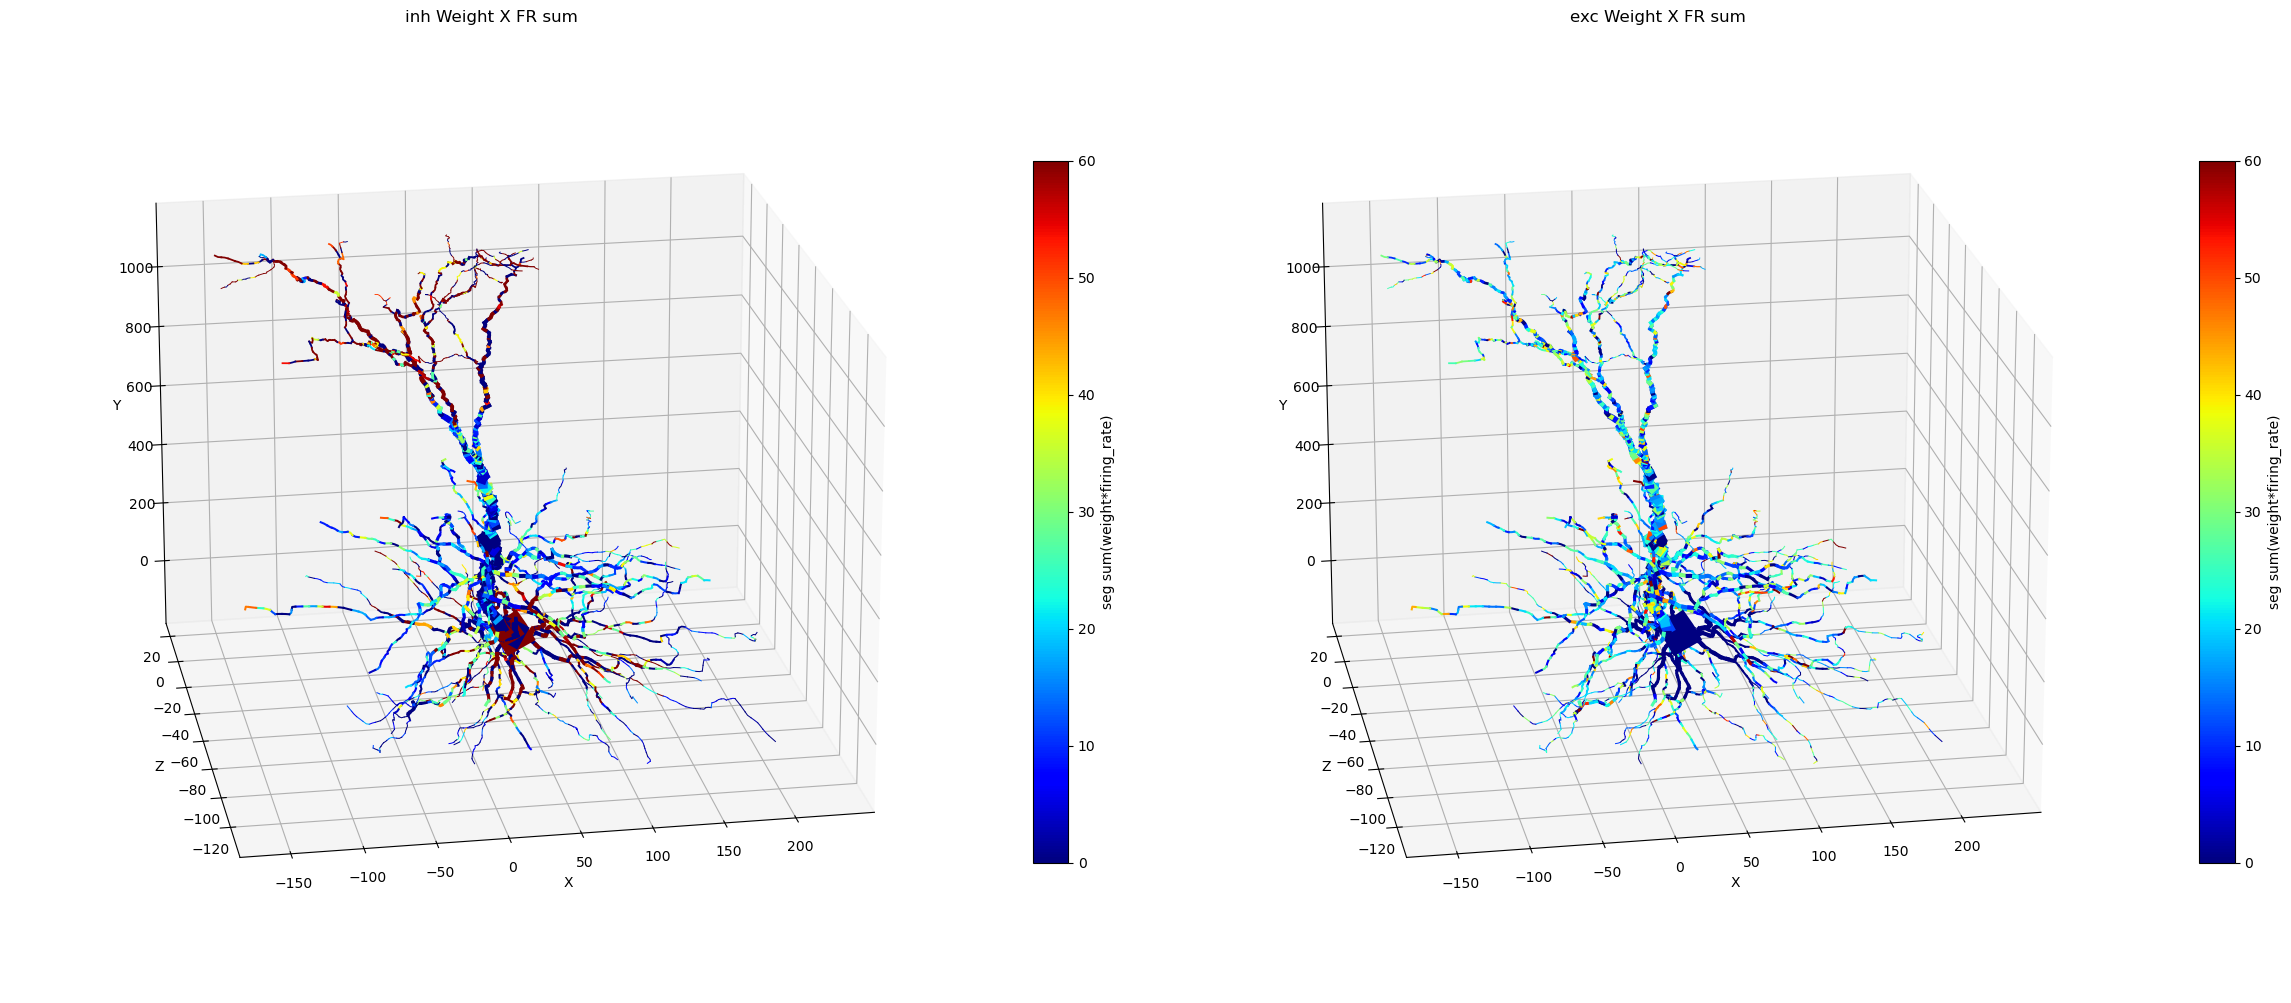

In [35]:
plot_var_on_morph_for_both_syn_types(df_inh=df_inh_grouped,
                                         df_exc=df_exc_grouped,
                                         var='weightXfr_sum',
                                         cbar_label='seg sum(weight*firing_rate)',
                                         title_suffix='Weight X FR sum',
                                         save_folder=save_folder,
                                         clim_max = 60)

Firing Rate

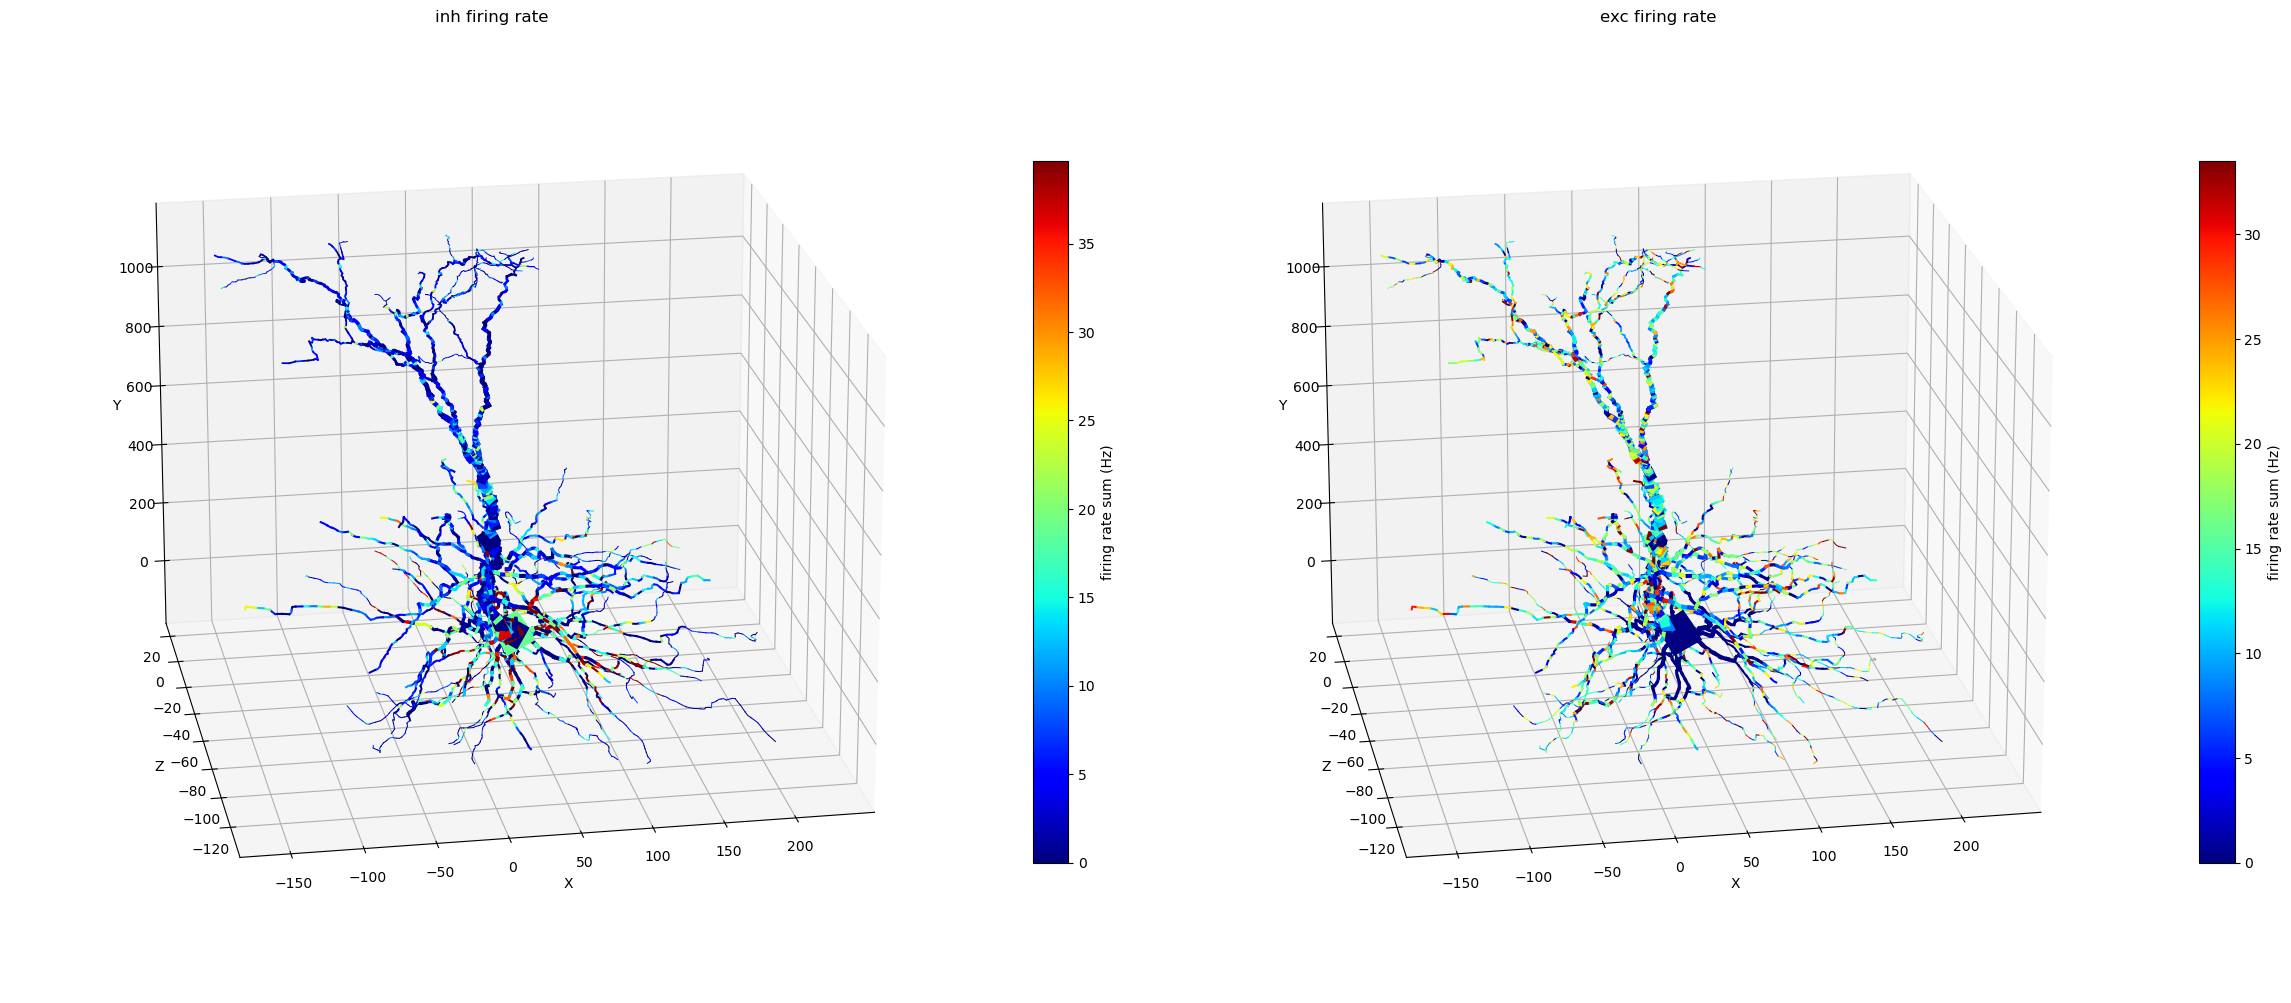

In [22]:
plot_var_on_morph_for_both_syn_types(df_inh=df_inh_grouped,
                                         df_exc=df_exc_grouped,
                                         var='fr_sum',
                                         cbar_label='firing rate sum (Hz)',
                                         title_suffix='firing rate',
                                         save_folder=save_folder,
                                         clim_max = None)

synapse density

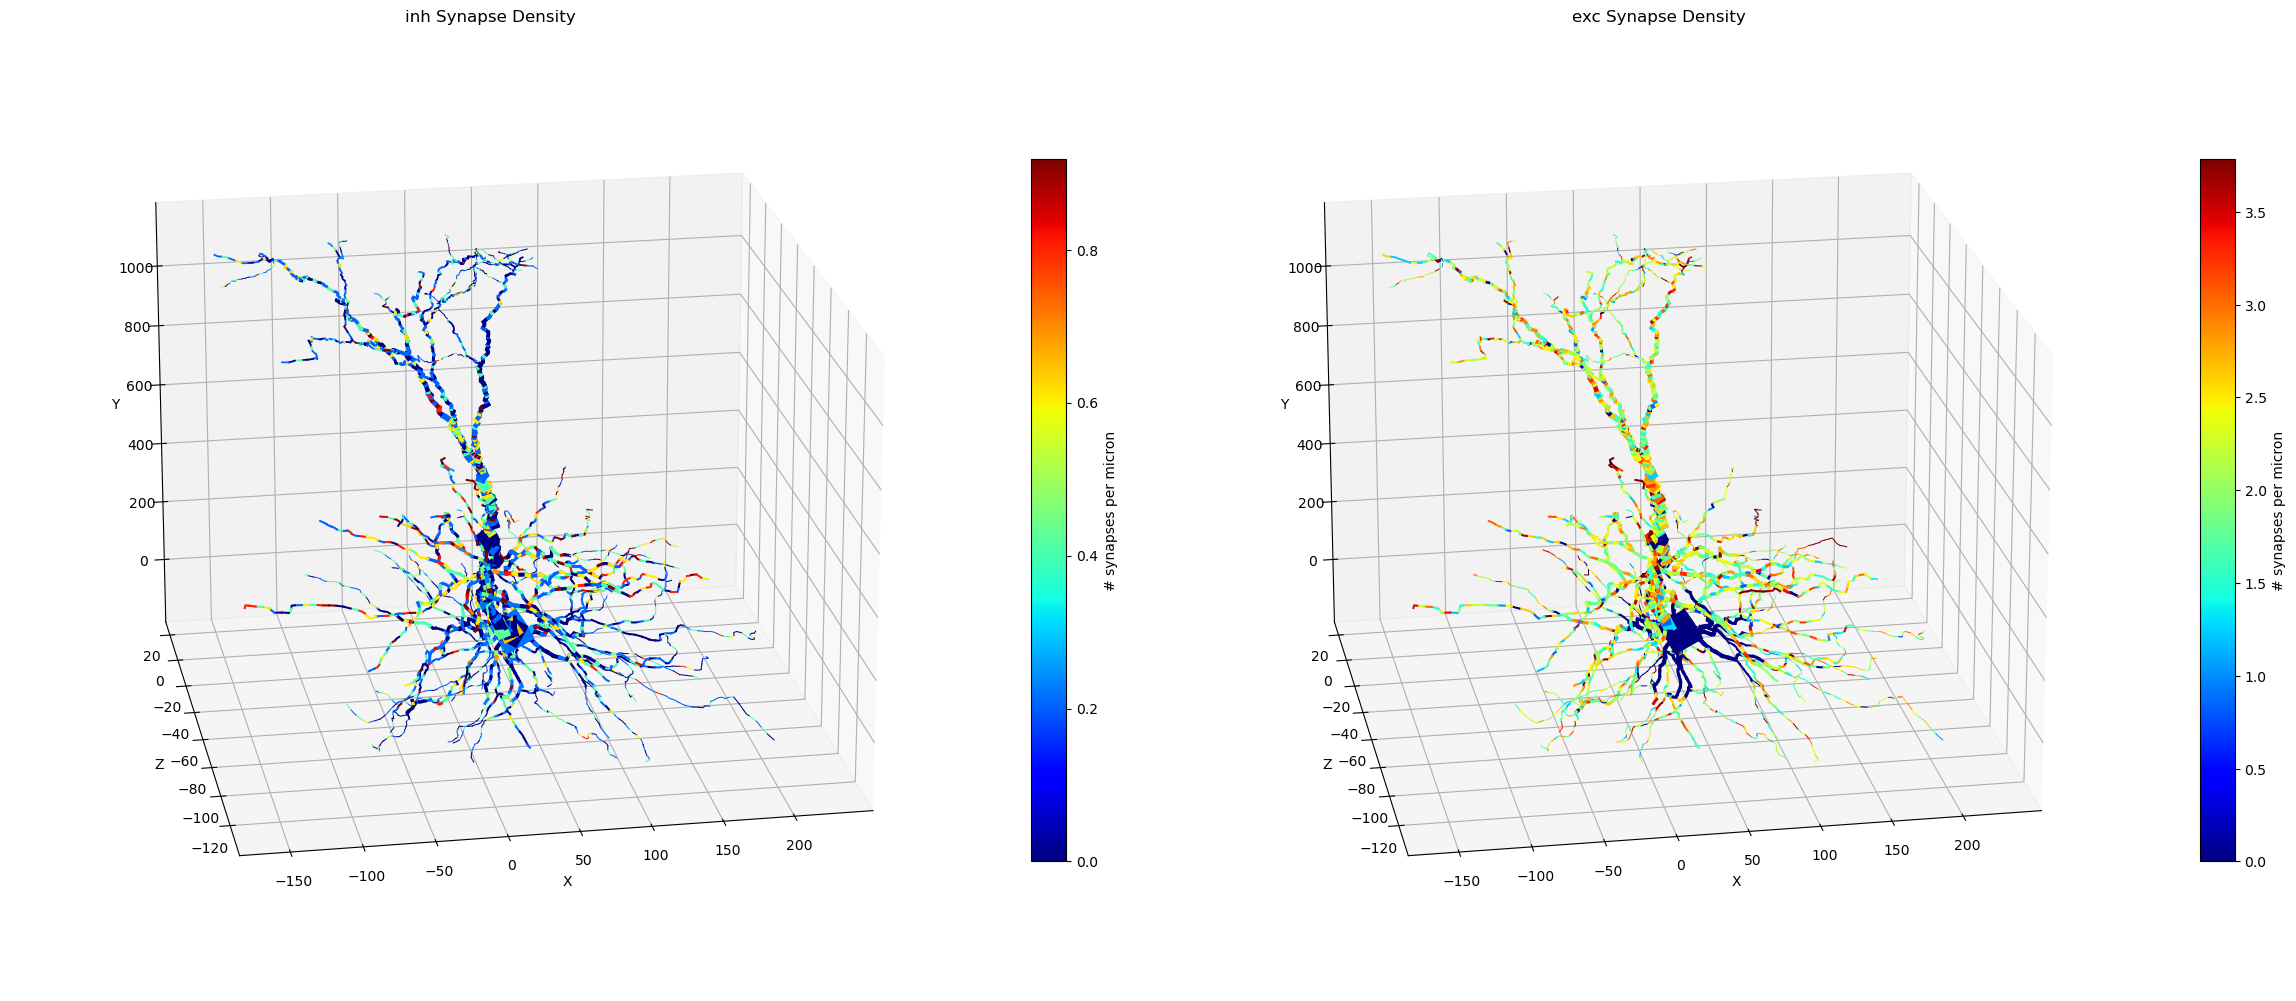

In [23]:
plot_var_on_morph_for_both_syn_types(df_inh=df_inh_grouped,
                                         df_exc=df_exc_grouped,
                                         var='syn_density',
                                         cbar_label='# synapses per micron',
                                         title_suffix='Synapse Density',
                                         save_folder=save_folder,
                                         clim_max=None)

number of synapses

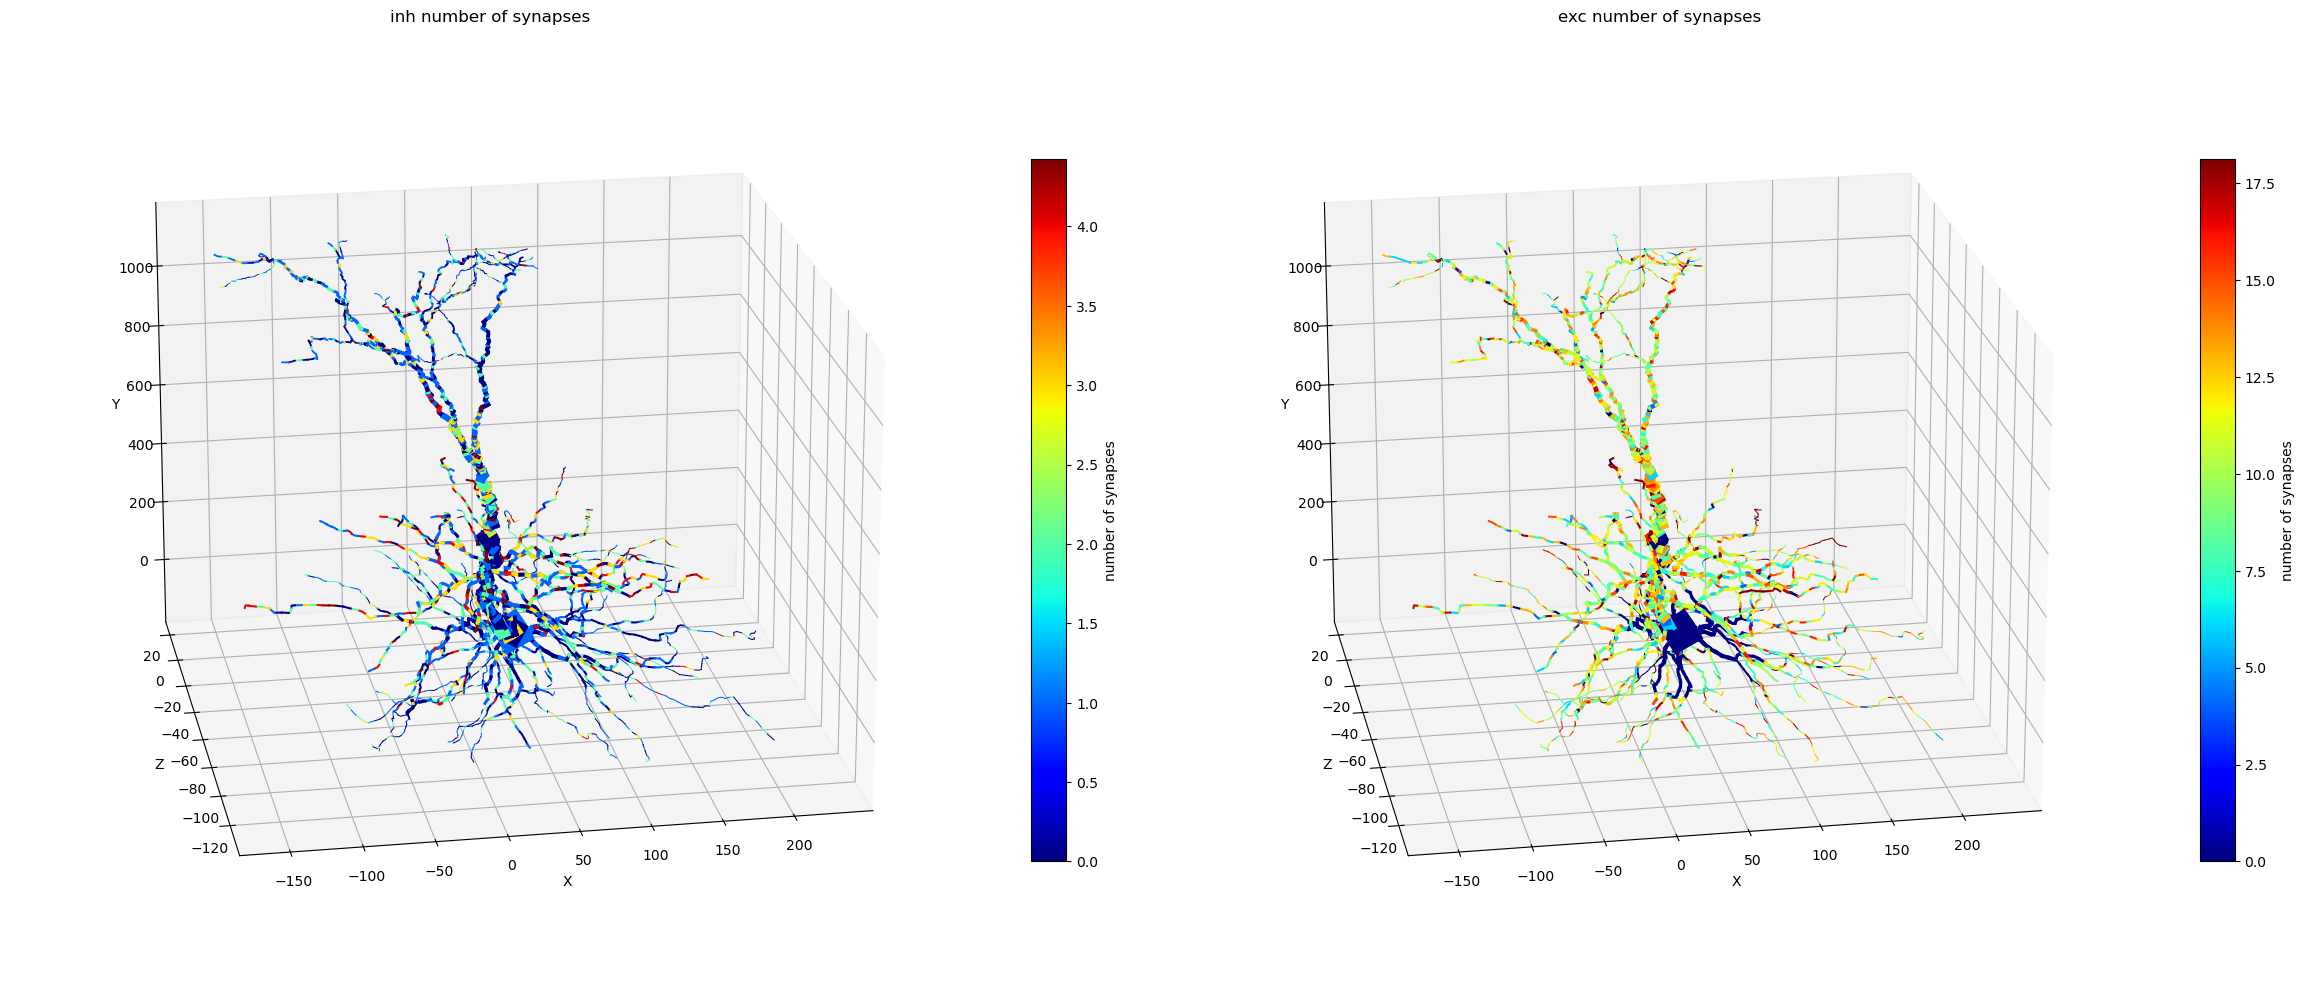

In [24]:
plot_var_on_morph_for_both_syn_types(df_inh=df_inh_grouped,
                                         df_exc=df_exc_grouped,
                                         var='num_syns',
                                         cbar_label='number of synapses',
                                         title_suffix='number of synapses',
                                         save_folder=save_folder,
                                         clim_max=None)

In [25]:
np.shape(seg_data)

(2630, 24)

In [26]:
np.shape(df_exc_grouped)

(2335, 21)

2D plots

In [27]:
df_exc_grouped.columns

Index(['seg_id', 'mean_firing_rate', 'pc_name', 'synapse_type', 'weight',
       'Distance', 'section', 'soma_trans_imp', 'seg_L', 'synapse_class',
       'num_syns', 'num_cells', 'weight_mean', 'weight_std', 'weight_sum',
       'fr_mean', 'fr_std', 'fr_sum', 'weightXfr', 'weightXfr_sum',
       'syn_density'],
      dtype='object')

In [28]:
sum(np.unique(df_exc_grouped['Distance']) < 50)

0

In [29]:
df_exc_grouped['syn_density']

0       2.453000
1       2.248583
2       1.226500
3       2.657416
4       2.453000
          ...   
2330    1.396523
2331    1.396523
2332    1.862031
2333    1.862031
2334    2.094784
Name: syn_density, Length: 2335, dtype: float64

In [30]:
df_exc_grouped['syn_density']

0       2.453000
1       2.248583
2       1.226500
3       2.657416
4       2.453000
          ...   
2330    1.396523
2331    1.396523
2332    1.862031
2333    1.862031
2334    2.094784
Name: syn_density, Length: 2335, dtype: float64

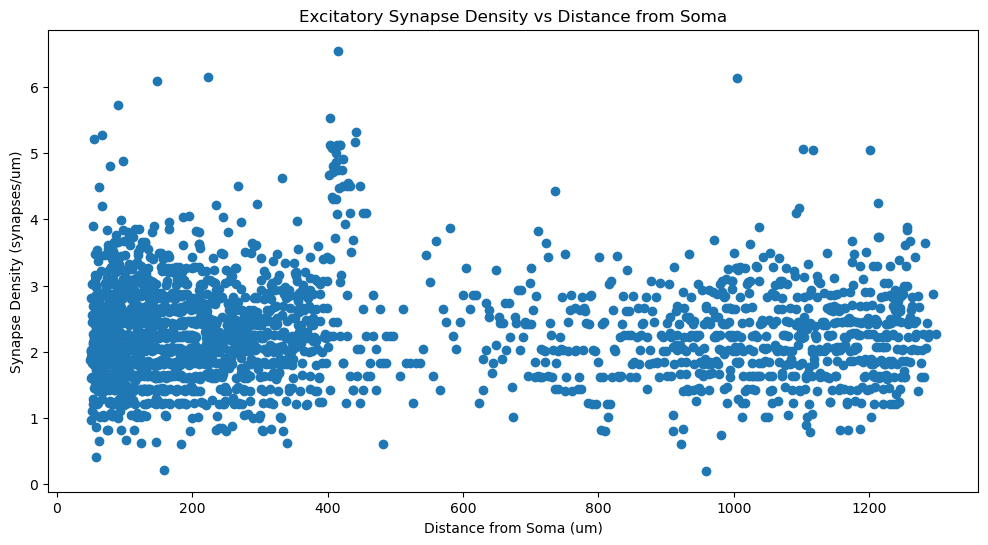

<Figure size 640x480 with 0 Axes>

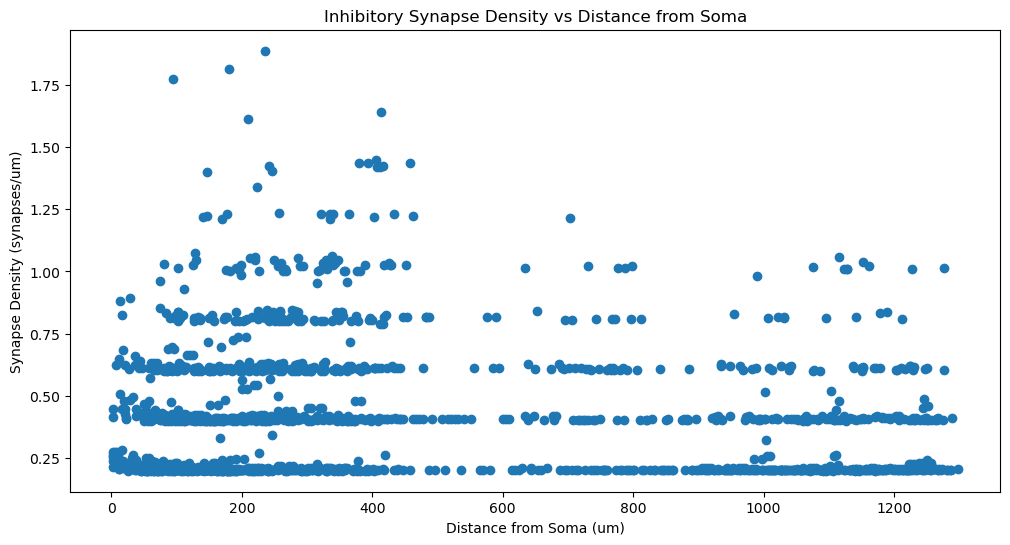

<Figure size 640x480 with 0 Axes>

In [31]:
# synapse density as a function of distance from soma
import matplotlib.pyplot as plt

for df, title_prefix in zip([df_exc_grouped, df_inh_grouped], ['Excitatory', 'Inhibitory']):
    # print(f"Plotting {title_prefix} synapse density vs distance from soma")
    plt.figure(figsize=(12, 6))
    plt.title(f'{title_prefix} Synapse Density vs Distance from Soma')
    plt.xlabel('Distance from Soma (um)')
    plt.ylabel('Synapse Density (synapses/um)')
    plt.scatter(df['Distance'], df['syn_density'])
    plt.show()
    plt.savefig(os.path.join(save_folder, f'{title_prefix}_synapse_density_vs_distance_2D.png'), dpi=300)

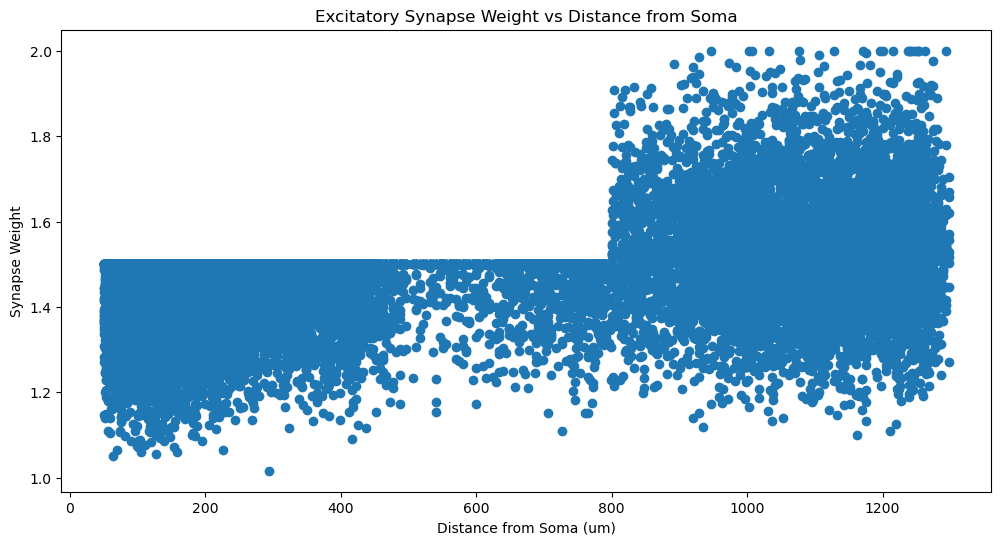

<Figure size 640x480 with 0 Axes>

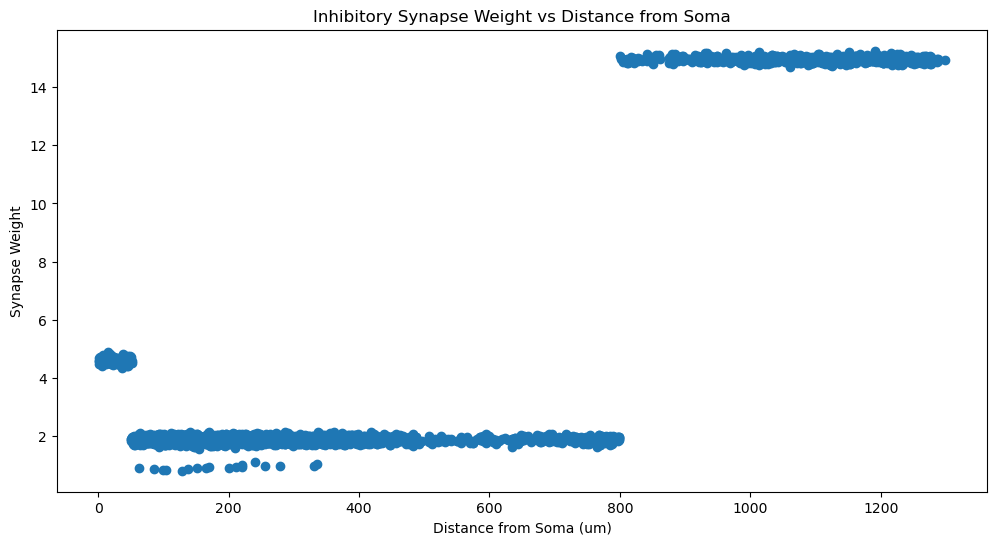

<Figure size 640x480 with 0 Axes>

In [32]:
for df, title_prefix in zip([df_exc_grouped, df_inh_grouped], ['Excitatory', 'Inhibitory']):
    # print(f"Plotting {title_prefix} synapse density vs distance from soma")
    plt.figure(figsize=(12, 6))
    plt.title(f'{title_prefix} Synapse Weight vs Distance from Soma')
    plt.xlabel('Distance from Soma (um)')
    plt.ylabel('Synapse Weight')
    # for idx, row in df.iterrows():
    #     for weight in row.weight:
    #         plt.scatter(row['Distance'], weight, label=row['seg_id'])

    x_vals = []
    y_vals = []
    labels = []

    for idx, row in df.iterrows():
        x_vals.extend([row['Distance']] * len(row['weight']))
        y_vals.extend(row['weight'])
        labels.extend([row['seg_id']] * len(row['weight']))

    plt.scatter(x_vals, y_vals)
    plt.show()
    plt.savefig(os.path.join(save_folder, f'{title_prefix}_synapse_weight_vs_distance_2D.png'), dpi=300)